In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('./results_htsinfer/zavolan_rnaseq_samples_filtered_result.csv')

#### Barplots for matches

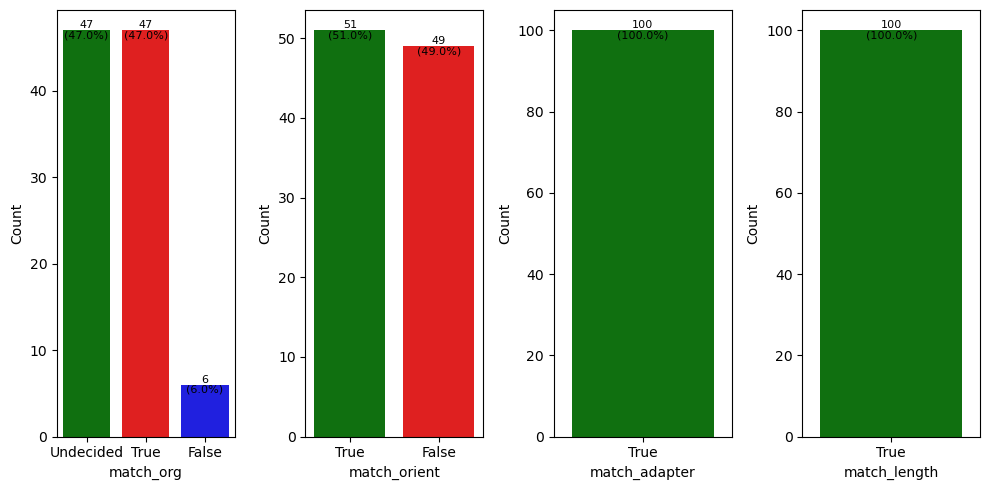

In [66]:
# List of 'match' columns
match_columns = ['match_org', 'match_orient', 'match_adapter', 'match_length']

# Define the colors for each category
colors = {'True': 'green', 'False': 'red', 'Undecided': 'blue'}

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(match_columns), figsize=(10, 5))

# Create bar plots for each 'match' column
for i, column in enumerate(match_columns):
    # Count the occurrences of each value
    value_counts = data[column].value_counts()
    
    # Calculate the percentage for each value
    percentages = value_counts / value_counts.sum() * 100

    # Define the order of x-axis labels
    order = value_counts.index.tolist()
    
    # Create the bar plot
    ax = sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i], order=order, palette=colors.values())
    
    # Add labels to the bars
    for j, v in enumerate(value_counts.values):
        ax.text(j, v, f'{v}', ha='center', va='bottom', fontsize=8)
        ax.text(j, v, f'({percentages[j]:.1f}%)', ha='center', va='top', fontsize=8)
    
    # Set the plot title and labels
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

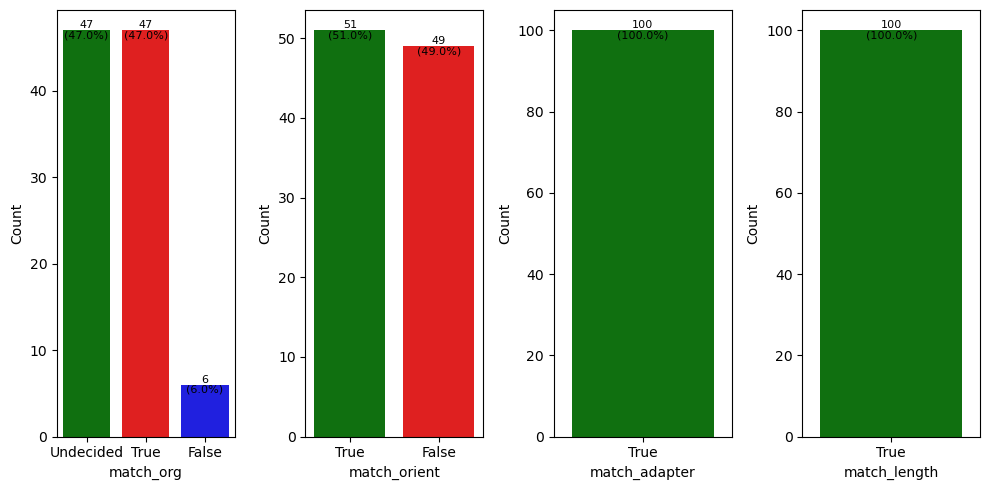

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of 'match' columns
match_columns = ['match_org', 'match_orient', 'match_adapter', 'match_length']

# Define the colors for each category
colors = {'True': 'green', 'False': 'red', 'Undecided': 'blue'}

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(match_columns), figsize=(10, 5))

# Create bar plots for each 'match' column
for i, column in enumerate(match_columns):
    # Count the occurrences of each value
    value_counts = data[column].value_counts()  # Include NaN counts

    # Create a complete set of categories including 'True', 'False', and 'Undecided'
    categories = ['True', 'False']
    if 'Undecided' in value_counts.index:
        categories.append('Undecided')

    # Reorder the value counts based on the complete set of categories
    value_counts = value_counts.reindex(categories)

    # Calculate the percentage for each value
    percentages = value_counts / value_counts.sum() * 100

    # Define the order of x-axis labels
    order = value_counts.index.tolist()

    # Create the bar plot
    ax = sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        ax=axes[i],
        order=order,
        palette=colors.values()
    )

    # Add labels to the bars
    for j, v in enumerate(value_counts.values):
        ax.text(j, v, f'{v}', ha='center', va='bottom', fontsize=8)
        ax.text(j, v, f'({percentages[j]:.1f}%)', ha='center', va='top', fontsize=8)

    # Set the plot title and labels
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


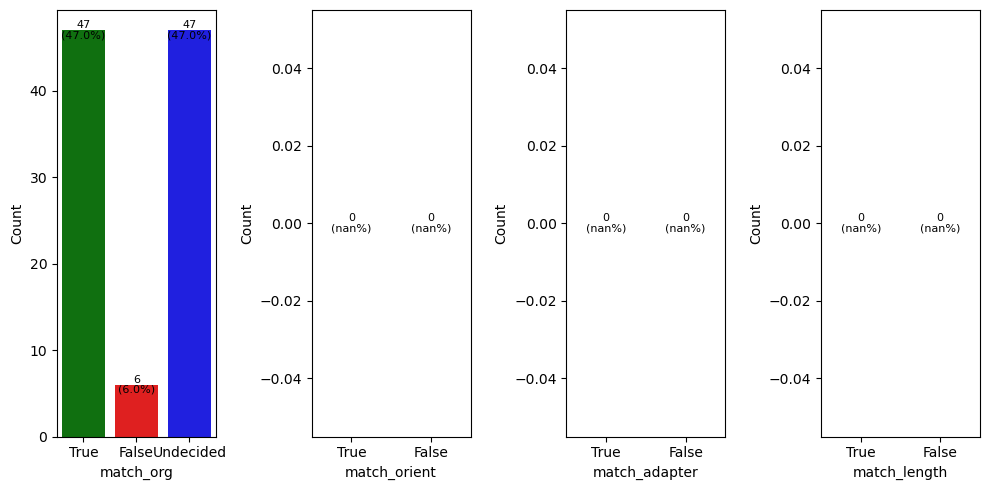

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of 'match' columns
match_columns = ['match_org', 'match_orient', 'match_adapter', 'match_length']

# Define the colors for each category
colors = {'True': 'green', 'False': 'red', 'Undecided': 'blue'}

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(match_columns), figsize=(10, 5))

# Create bar plots for each 'match' column
for i, column in enumerate(match_columns):
    # Count the occurrences of each value
    value_counts = data[column].value_counts()

    # Create a complete set of categories including 'True', 'False'
    categories = ['True', 'False']

    # Include 'Undecided' category if it exists in the data
    if 'Undecided' in value_counts.index:
        categories.append('Undecided')
    else:
        categories = categories

    # Reorder the value counts based on the complete set of categories
    value_counts = value_counts.reindex(categories, fill_value=0)

    # Calculate the percentage for each value
    percentages = value_counts / value_counts.sum() * 100

    # Define the order of x-axis labels
    order = categories

    # Create the bar plot
    ax = sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        ax=axes[i],
        order=order,
        palette=colors.values()
    )

    # Add labels to the bars
    for j, v in enumerate(value_counts.values):
        ax.text(j, v, f'{v}', ha='center', va='bottom', fontsize=8)
        ax.text(j, v, f'({percentages[j]:.1f}%)', ha='center', va='top', fontsize=8)

    # Set the plot title and labels
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#### Barplots for organism match

In [ ]:
data_most_common = data.loc[data['org'].isin(
    ['hsapiens', 'mmusculus', 'athaliana', 'dmelanogaster', 'drerio', 'rnorvegicus', 'zmays', 'mmulatta', 'scerevisiae', 'osativa']
)].copy()

category_counts_all = np.unique(data_most_common['match_org_all'], return_counts=True)
percentages_all = category_counts_all[1] / len(data_most_common) * 100

category_counts_100 = np.unique(data_most_common['match_org_100'], return_counts=True)
percentages_100 = category_counts_100[1] / len(data_most_common) * 100


fig, ax = plt.subplots(1,2, figsize=(10, 5), gridspec_kw={'width_ratios': [.5, .5]})
g = sns.barplot(data=data_most_common, x=category_counts_all[0], y=percentages_all, palette="Blues", ax=ax[0])
g.set(xlabel="Match Category", ylabel="Percentage")
g.bar_label(g.containers[0], fmt='%.f%%')
g.set(title='Matched organism %, 10 most frequent organisms' + '\nAll organism transcripts' 
       + '\nLibrary source min-match percentage: 2' 
       + '\nLibrary source min frequency ratio: 2')
f = sns.barplot(data=data_most_common, x=category_counts_100[0], y=percentages_100, palette="Blues", ax=ax[1])
f.set(xlabel="Match Category", ylabel="Percentage")
f.bar_label(f.containers[0], fmt='%.f%%')
f.set(title='Matched organism %, 10 most frequent organisms' + '\n100 most frequent organism transcripts' 
       + '\nLibrary source min-match percentage: 2' 
       + '\nLibrary source min frequency ratio: 2')
plt.savefig("org_test_results.png", dpi=250, bbox_inches='tight')

#### Histograms for predicted adapters

In [ ]:
# Histogram of 1st predicted adapter percent #1
# # Drop 0 percentages of both SE and PE reads
result_final_n = result_final.drop(result_final[
    (result_final['1_percent_1'] == 0) &
    (result_final['2_percent_1'] == 0) |
    (result_final['1_percent_1'] == 0) &
    result_final['2_percent_1'].isna()].index)
all_percent = pd.concat([result_final_n['1_percent_1'],
                            result_final_n['2_percent_1']])
all_percent = all_percent[all_percent != 0]
fig, axs = plt.subplots(1, figsize=[8, 8])
sns.histplot(data=all_percent, binwidth=2).set(
    title='Fraction of reads containing most '
            + 'prevalent adapter\nID: ' + str(results_folder)
            + '\nNo. of records: ' + str(records)
            + '\nRead layout min-match percentage: ' + str(min_match)
            + '\nRead layout min frequency ratio: ' + str(min_freq))
plt.xlim(0, 100)
plt.savefig(str(RESULTS_HTS_DIR) + '/' + str(results_folder)
            + '/2_Hist_1st_pred_adapter_full.png', dpi=100)

# Histogram of 1st predicted adapter percent #2
fig, axs = plt.subplots(1, figsize=[8, 8])
sns.histplot(data=all_percent, binwidth=0.2).set(
    title='Fraction of reads containing most '
            + 'prevalent adapter\nID: '
            + str(results_folder)
            + '\nNo. of records: ' + str(records)
            + '\nRead layout min-match percentage: ' + str(min_match)
            + '\nRead layout min frequency ratio: ' + str(min_freq))
plt.xlim(0, 10)
plt.savefig(str(RESULTS_HTS_DIR) + '/' + str(results_folder)
            + '/3_Hist_1st_pred_adapter_10.png', dpi=100)

# Histogram of 1st vs 2nd predicted adapter ratio
result_final_n = result_final.drop(result_final[
    (result_final['1_percent_1'] == 0) &
    (result_final['2_percent_1'] == 0) |
    (result_final['1_percent_1'] == 0) &
    result_final['2_percent_1'].isna()].index)
result_final_n['1_ratio'] = (
    result_final_n['1_percent_1'] / (
        result_final_n['1_percent_2'] + 0.01))
result_final_n['2_ratio'] = (
    result_final_n['2_percent_1'] / (
        result_final_n['2_percent_2'] + 0.01))
all_ratios = pd.concat(
    [result_final_n['1_ratio'], result_final_n['2_ratio']])
fig, axs = plt.subplots(1, figsize=[8, 8])
sns.histplot(data=all_ratios).set(
    title='Fraction of reads with most prevalent adapter '
    + 'vs. second most prevalent\nID: '
    + str(results_folder)
    + '\nNo. of records: ' + str(records)
    + '\nRead layout min-match percentage: ' + str(min_match)
    + '\nRead layout min frequency ratio: ' + str(min_freq),
    xscale="log")
plt.savefig(str(RESULTS_HTS_DIR) + '/' + str(results_folder)
            + '/4_Hist_1st_vs_2nd_pred_adapter_ratio.png', dpi=100)

#### Barplots for performance times

In [ ]:
data_5 = data.loc[data['process'].isin(['processing_dur','extracting_dur','kallisto_quant_dur','alignment_dur','cutadapt_dur'])].copy()
data_total = data.loc[data['process'] == 'total_dur'].copy()

# Replace NaN values in 'duration' column with zeros
data_5['duration'] = data_5['duration'].fillna('00:00:00')
data_total['duration'].fillna('00:00:00', inplace=True)

# Convert 'duration' column to timedelta format
data_5['duration'] = pd.to_timedelta(data_5['duration'])
data_total['duration'] = pd.to_timedelta(data_total['duration'])

# Extract total seconds from timedelta values and convert to numeric
data_5['duration'] = data_5['duration'].dt.total_seconds()
data_total['duration'] = data_total['duration'].dt.total_seconds()

fig, ax =plt.subplots(1,2, figsize=(9, 5), gridspec_kw={'width_ratios': [.80, .20]})
g = sns.barplot(data=data_5, x='process', y='duration', hue='perf_group', errorbar='se', palette="bright", alpha=.6, ax=ax[0])
g.set(xlabel="", ylabel="Duration (seconds)")
g.set_xticklabels(["Process records", "Extract read length", "Kallisto quantification", "STAR Alignment", "Cutadapt"], rotation=45)
g.legend(title="No. of records")

f = sns.barplot(data=data_total, x='process', y='duration', hue='perf_group', errorbar='se', palette="bright", alpha=.6, ax=ax[1])
f.set(xlabel="", ylabel="")
f.set_xticklabels(["Total HTSinfer run"], rotation=45)
f.legend_.remove()
sns.despine()
plt.savefig("perf_test_results.png", dpi=250, bbox_inches='tight')